<a href="https://colab.research.google.com/github/DeisyData/IA_RedesNeuronales/blob/main/Explorador_NN_ClasificacionBinaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificación binaria con separación Lineal**

**Librerías**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

Se usa [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) para generar un data set linealmente separable



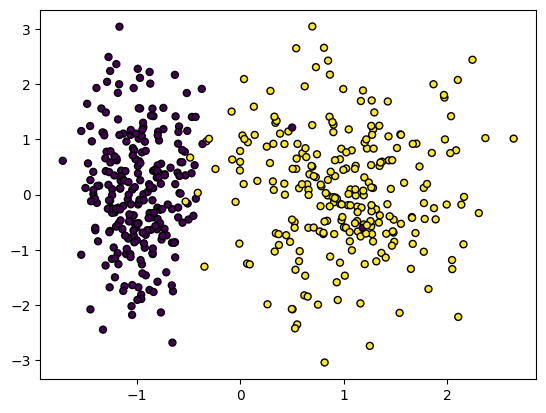

In [ ]:
X1, Y1 = make_classification(
    n_samples = 500, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1
)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

## Paso 2. Dividir el data set en el conjunto de entrenamiento y prueba

Se divide el dataSet en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((400, 2), (400,), (100, 2), (100,))

## Paso 3. Entrenar el modelo con X_train y y_train

Usando keras se construye una red neuronal de 2 entradas y una salida,

In [22]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

modelo_2 = Sequential([
    Dense(2, input_dim=2, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])
modelo_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modelo_2.fit(X_train, y_train, epochs=300, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# Resumen del modelo
modelo_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 83 (336.00 B)

 Trainable params: 27 (108.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 56 (228.00 B)

In [24]:
!pip install visualkeras  # Instalamos visualkeras

/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


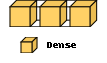

In [25]:
import visualkeras

# Se muestra el modelo en 3D con leyendas
visualkeras.layered_view(modelo_2,
                         legend=True)

## Medidas de desempeño

In [26]:
history = modelo_2.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9900 - loss: 0.0567 - val_accuracy: 0.9625 - val_loss: 0.0776
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9908 - loss: 0.0479 - val_accuracy: 0.9625 - val_loss: 0.0777
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9842 - loss: 0.0731 - val_accuracy: 0.9625 - val_loss: 0.0782
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9913 - loss: 0.0405 - val_accuracy: 0.9625 - val_loss: 0.0785
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9846 - loss: 0.0722 - val_accuracy: 0.9625 - val_loss: 0.0786
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9876 - loss: 0.0615 - val_accuracy: 0.9625 - val_loss: 0.0790
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9908 - loss: 0.0473 - val_accuracy: 0.9625 - val_loss: 0.0790
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9823 - loss: 0.0908 - val_accuracy: 0.9625 - val_lo

In [27]:
test_loss, test_accuracy = modelo_2.evaluate(X_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9908 - loss: 0.0441  


In [28]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss)+1)

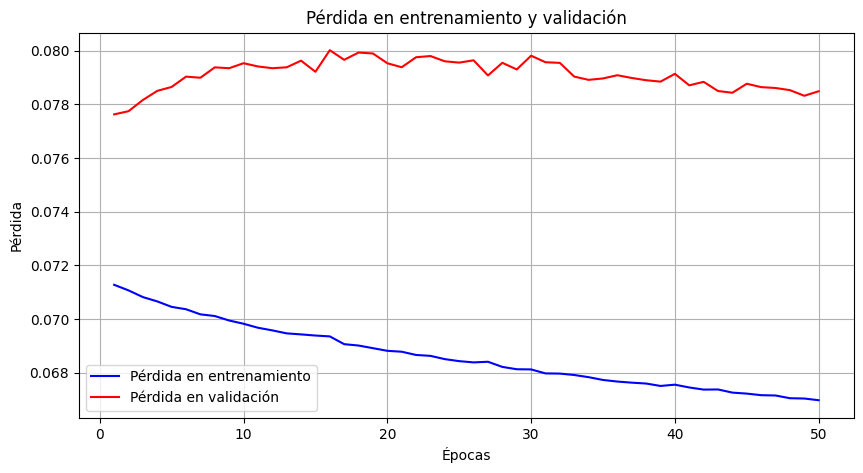

In [29]:
# Gráfico de pérdida
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, 'b', label='Pérdida en entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida en validación')
plt.title('Pérdida en entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

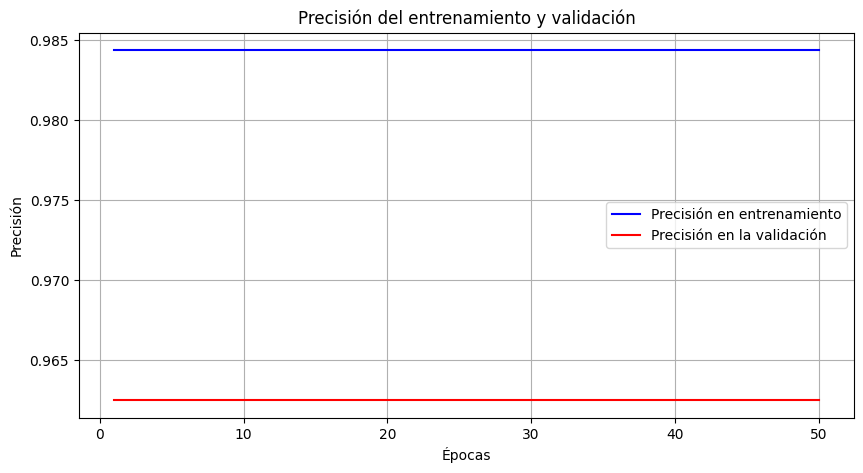

In [30]:
# Gráfico de precisión
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_acc, 'b', label='Precisión en entrenamiento')
plt.plot(epochs, val_acc, 'r', label='Precisión en la validación')
plt.title('Precisión del entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

## Paso 4. Probar el modelo con X_test y y_test

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


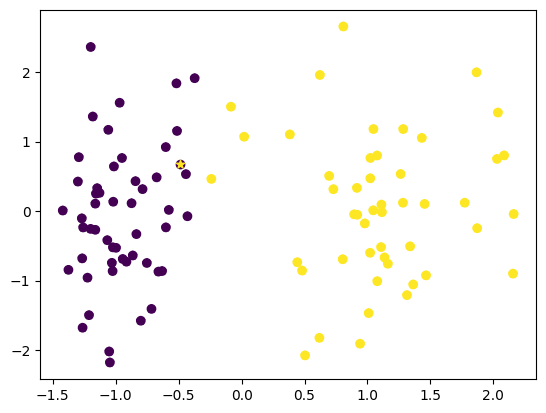

In [31]:
resultado_pruebas_2 = modelo_2.predict(X_test).round()
plt.scatter(X_test[:, 0], X_test[:, 1], c=resultado_pruebas_2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='*')

Con 100 datos de prueba 8 datos mal clasificados 8/100 8% (92%). El Accuracy 97%  con datos de entrenamiento.

Otra ejecucion
91% en train
91% en test

In [32]:
import numpy as np

8377/8377 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


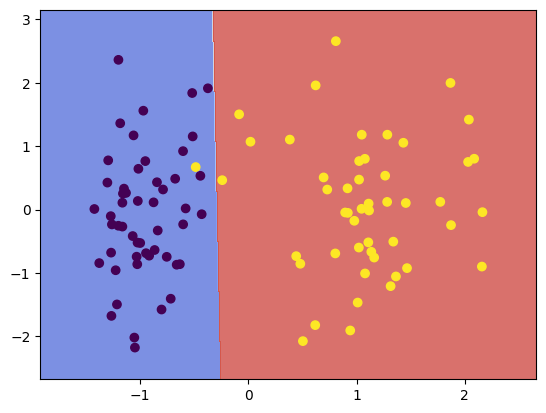

In [33]:

x_min, x_max = X_test[:, 0].min() - 0.5, X_test[:, 0].max() + 0.5
y_min, y_max = X_test[:, 1].min() - 0.5, X_test[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = modelo_2.predict(np.c_[xx.ravel(), yy.ravel()]).round()
plt.contourf(xx, yy, Z.reshape(xx.shape), alpha=0.75, cmap='coolwarm')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')
plt.show()
